La page ci-présente existe en version notebook téléchargeable grâce au bouton ![Bouton](./images/bouton_tl.png) (choisir le format `.ipynb`). On rappelle qu'l faut ensuite l'enregistrer dans un répertoire adéquat sur votre ordinateur (`tp3` par exemple dans votre répertoire personnel) puis lancer Jupyter Notebook depuis Anaconda pour accéder au notebook, le modifier et exécutez les cellules de code adéquates.

# (TP) Caractéristique d'une diode.

## Caractéristique statique d'une diode. (1h30)

### Manipulations

```{admonition} Mesure unique et incertitude
:class: tip
* Réaliser le montage proposé dans votre protocole et réaliser les mesures de tension et d'intensité voulue pour une tension du GBF de 5V.
* Faire un bilan des incertitudes et les estimer pour chaque source. Commenter le caractère prépondérant ou non de chaque source.

Les données sur les incertitudes de mesure associées aux mesures données par les multimètres Fluke sont disponibles [ici](https://moodlecpge.stanislas.fr/mod/resource/view.php?id=45) (connexion au site nécessaire). Une explication de l'utilisation de ces domaines se trouve [ici](https://moodlecpge.stanislas.fr/mod/page/view.php?id=44).
```

__Par la suite, et _pour simplifier l'étude_, on considèrera qu'il n'y a qu'une seule source d'incertitude pour chaque mesurande : celle qui est la plus importante par les précédentes.__ Attention, en réalité, ça n'est pas vrai pour toutes les mesures à venir.

```{admonition} Manipulation
:class: tip
Réaliser le montage proposé dans votre protocole et tracer la caractéristique statique de la diode. Vous utiliserez la cellule de code ci-dessous pour tracer la caractéristique statique.
```

### Tracé de la courbe

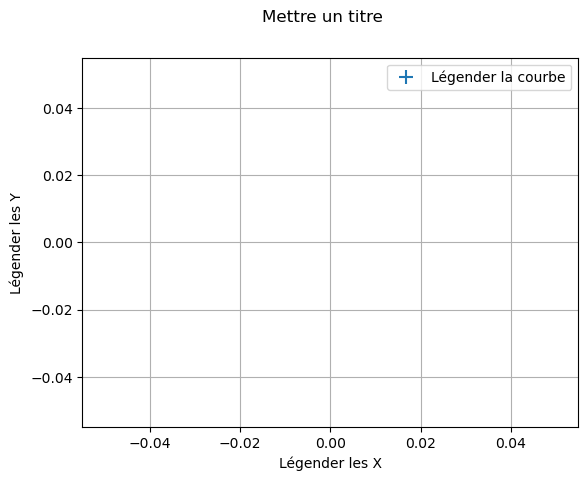

In [1]:
""" On importe pour vous les bibliothèques scientifiques utiles."""
import numpy as np
import matplotlib.pyplot as plt

"""Entrer ci-dessous les quatre vecteurs numpy correspondant :
- aux mesures de tensions
- aux mesures d'intensité
- aux estimations d'inceritude sur U (on rappelle que vous n'estimez que la plus importante)
- aux estimations d'inceritude sur I (on rappelle que vous n'estimez que la plus importante)
"""
u = np.array([])  # Valeurs de tensions
i = np.array([])  # Valeurs d'intensité

uu = np.array([])  # Incertitudes sur les tensions (ce sera un vecteur numpy)
ui = np.array([])  # Incertitudes sur les intensités (ce sera un vecteur numpy)


"""Vous allez maintenant tracer le graphique. Le script étant écrit,
il ne reste qu'à modifier les légendes.
"""
f,ax = plt.subplots()
f.suptitle("Mettre un titre")
ax.set_xlabel("Légender les X")
ax.set_ylabel("Légender les Y")
ax.errorbar(u, i, xerr=uu, yerr=ui, label="Légender la courbe", linestyle="",)
ax.grid()
ax.legend()
plt.show()

### Estimation de la tension seuil
On va estimer la tension seuil par une méthode d'optimisation basée sur la minimisation des écarts entre les points de mesure et la courbe (droites par morceaux ici) pour une valeur de $U_d$. Vous pouvez obtenir [des explications sur la méthode d'optimisation](u_seuil) mais la méthode n'est pas à connaître.

Vous devez estimer un intervalle dans lequel la tension seuil va se trouver et entrer ces valeurs pour `ud_min, ud_max`. La fonction `eval_ud` cherchera la tension dans cet intervalle. Les seules lignes à modifier sont précisées dans le code.

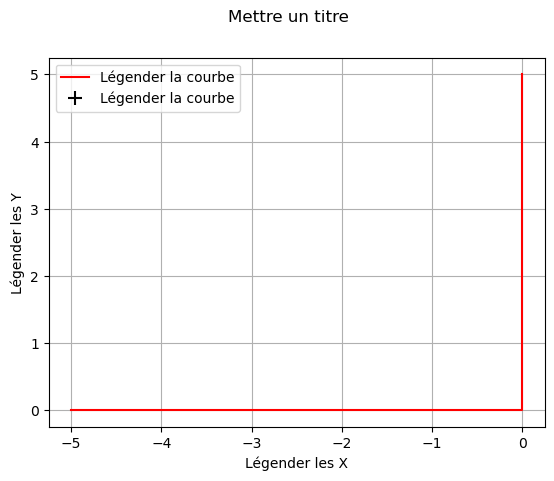

In [2]:
ud_min, ud_max = -1, 0  # LIGNE A MODIFIER. Le programme cherchera la valeur seuil dans l'intervale.

def eval_ud(u, i, ud_min, ud_max):
    """Fonction qui évalue la tension seuil la plus adaptée au tracé expérimental
    u : Vecteur contenu les mesures de tension
    i : Vecteur contenu les mesures d'intensité
    ud_min, ud_max : Flottant délimitant l'intervalle dans lequel on recherche UD

    Renvoie : un flottant correspondant à la valeur de ud optimale
    """
    N = 1000  # Nombre de valeur de ud qui seront testée entre 0 et 1 V
    n = len(u)
    ud = np.linspace(ud_min, ud_max, N)  # Valeurs de ud testées
    dud = np.zeros(N)  # On stocke l'estimateur qui permettra de décider quelle valeur de ud est la meilleure
    for k in range(N):  # Calcul de l'estimateur
        ds = 0
        for j in range(n):
            d = min(abs(u[j]-ud[k]), i[j])
            ds = ds + d ** 2
        dud[k] = ds
    return ud[np.argmin(dud)]

"""Ecrire ci-dessous l'instruction qui va enregistrer dans la variable ud_estim l'estimation de ud
avec la méthode précdente"""
ud_estim = 0  # LIGNE A MODIFIER en appelant eval_ud


"""Ajout du modèle sur le graphique.
"""
f,ax = plt.subplots()
f.suptitle("Mettre un titre")
ax.set_xlabel("Légender les X")
ax.set_ylabel("Légender les Y")
ax.errorbar(u, i, xerr=uu, yerr=ui, label="Légender la courbe", linestyle="", color="black")
ax.plot([-5, ud_estim, ud_estim], [0, 0, 5], label="Légender la courbe", linestyle="-",color="red")
ax.grid()
ax.legend()
plt.show()


"""La commande ci-après permettra de sauvegarder le graphique dans un fichier image
(dans le répertoire où se trouve le notebook). Vous pourrez l'insérer dans votre compte-rendu.
"""
f.savefig("caracteristique_diode.png")

```{admonition} Exploitation
:class: tip
Vous devez maintenant analyser sur votre compte-rendu votre caractéristique statique (correspond-elle aux attentes ?) et l'estimation de votre tension seuil (il s'agit d'une estimation très grossière qui ne servira pas de manière quantitative par la suite, on ne cherchera donc pas à estimer l'incertitude sur $U_d$).
```

## Acquisition numérique d'un signal. (30 minutes)
Avant de chercher à obtenir la caractéristique dynamique d'une diode grâce à une carte d'acquisition, il est important de comprendre certains points clés d'une acquisition numérique en lien avec les paramètres d'acquisition. La partie sur la _synchronisation_ sera encore valable quand on utilise un oscilloscope.

### Réglages généraux.
* On commencera par brancher directement le GBF sur la carte d'acquisition FOXY. Sélectionner alors la voie à acquérir en ordonnée en fonction de vos branchements et l'horloge (base de temps) en abscisse.
* On va pour l'instant étudier un signal de fréquence 960Hz et d'amplitude 3V.
    * Comment choisir le calibre de la voie d'acquisition (Onglet calibre sous le mini-graphique à gauche lorsqu'on clic sur le symbole de la voie d'acquisition) ?
    * Comment choisir la durée d'acquisition (Lorsqu'on clic sur le symbole de l'horloge) ? _C'est un calcul __d'ordre de grandeur__, ne cherchez pas à faire un calcul exact de période du signal_.
* On remarque que d'autres réglages sont proposées :
    * Acquisition continue (ou unique si l'option est décochée)
    * Nombre de points
    * Onglet Synchronisation.

### Nombre de points et fréquence d'échantillonnage
_Pour l'instant, décocher l'option `Acquisition continue` et désactiver la Synchronisation (dans l'onglet du même nom) s'ils sont activés._

On va voir l'influence du nombre de points de sur le signal obtenu ou plus précisément de la __fréquence d'échantillonnage__ c'est-à-dire le nombre de points de mesure réalisés par seconde.

````{admonition} Influence de la fréquence d'échantillonnage
:class: tip
1. Pensez à régler le GBF pour qu'il délivre la tension voulue (_ne pas oublier d'activer le GBF avec le bouton `ON`_)
2. Comment obtenir la fréquence d'échantillonnage à partir de la durée d'acquisition et du nombre de points de mesure ? En déduire le nombre de points nécessaire pour obtenir une fréquence d'échantillonnage de 100kHz puis de 10kHz pour une durée d'acquisition de 10ms.
3. Régler le nombre de points adéquats puis observer le signal acquis pour les deux fréquence d'échantillonnage précédentes. Mesurer alors (rapidement) la période du signal et la comparer à la valeur attendue.
4. Choisir maintenant 100 points de mesure et modifier la durée d'acquisition pour avoir une fréquence d'échantillonnage de 1kHz. Observer le signal et mesurer la fréquence. Commenter.
````
```{note}
Un clic-droit sur le graphique permet d'obtenir un menu où vous pouvez choisir de mesurer des valeurs.
```

Vous rendrez compte de vos observations dans un tableau comme ci-dessous:

|Fréquence d'échantillonnage|100kHz|10kHz|1kHz|
|:-|:-:|:-:|:-:|
|Durée d'acquisition|10ms|10ms|?|
|Fréquence du signal attendue|960Hz|960Hz|960Hz|
|Fréquence du signal mesurée|?|?|?|



```{sidebar} En pratique
* Les consoles FOXY en TP sont limités à 16000 points et une fréquence d'échantillonage de 10MHz. Ce sera suffisant pour nous.
* Un oscilloscope règle lui même sa fréquence d'échantillonnage en fonction de ses limites. On ne peut jouer que sur la durée d'acquisition pour éviter d'acquérir sur un temps trop long.

Des explications plus visuelles sur des simulations seront données lors du traitement des capacités numériques.
```
````{admonition} Critère de Shannon-Nyqvist
:class: important
Lorsqu'on fait l'acquisition d'un signal dont la fréquence maximale $f_{\max}$ (dans son spectre), il est nécessaire que la fréquence d'échantillonnage $f_e$ soit __au moins deux fois supérieure  à $f_{\max}$ :

$$
f_e > 2 f_{\max}
$$

En pratique, __on se placera à une fréquence d'échantillonnage bien plus grande que la limite du critère de Shannon-Nyqvist__ pour obtenir un visuel acceptable.
````

### Acquisition unique ou continue ?
```{admonition} Question
:class: tip
* Dans quel cas une acquisition unique est-elle obligatoire ?
* Dans quel cas une acquisition continue est-elle préférable voire obligatoire ?
* Revenir à une fréquence d'échantillonage acceptable et activer l'acquisition continue. Quel problème rencontre-t-on. La __synchronisation__ va permettre de résoudre ce problème.
```

### Synchronisation
Utiliser la seconde sortie du GBF à disposition pour délivrée un signal sinusoïdal de fréquence 1960Hz et d'amplitude 3V et le brancher sur une autre voie de la carte d'acquisition.

````{admonition} Manipulation
:class: tip
1. Activer l'acquisition continue et lancer l'acquistion des deux signaux simultanément (vérifier que la durée d'acquisition et la fréquence d'échantillonnage permettent de visualiser les deux signaux correctement).
2. Activer la synchronisation (Onglet synchronisation dans le menu associé à l'horloge) et choisir :
    1. Une synchronisation sur la première voie du GBF avec une pente montante et une tension de 1V.
    2. Une synchronisation sur la première voie du GBF avec une pente descendante et une tension de 1V.
    3. Une synchronisation sur la première voie du GBF avec une pente montante et une tension de 4V.
    4. Une synchronisation sur la seconde voie du GBF avec une pente montante et une tension de 1V.
3. Commenter ce que vous observez à chaque fois et en déduire une explication du rôle :
    1. De la voie de synchronisation
    2. Du niveau de synchronisation
    3. De la pente de synchronisation

````
```{margin}
Avec un oscilloscope, la synchronisation est toujours nécessaire. Souvent les réglages automatiques suffisent mais si le signal n'est pas stable, il faut penser à la régler.
```

## Caractéristique dynamique d'une diode (1h)

### Utilisation de FOXY

#### Manipulation
Réaliser le montage proposé dans votre protocole pour visualiser la caractéristique dynamique de la diode. Observer alors les caractéristiques de la diode pour les tensions suivantes :
1. Un signal sinusoïdale de fréquence 1kHz, d’amplitude 10V et de valeur moyenne nulle
2. Un signal sinusoïdale de fréquence 20kHz, d’amplitude 3V et de valeur moyenne 1V
3. Un signal triangulaire de fréquence 3kHz, d’amplitude 3V, de valeur basse -2V
4. Un signal créneau de fréquence 500Hz, d’amplitude 8V et de valeur moyenne nulle
5. Un signal créneau de fréquence 30kHz, de valeur basse 0V et de valeur haute 6V.

_La meilleur manière d'enregister les tracés pour les mettre dans votre compte-rendu est une capture d'écran._

```{attention}
On pensera bien à réfléchir aux paramètres d'acquisition __avant de lancer l'acquisition__.
```

#### Exploitation
````{admonition} Exploitation
:class: tip
Comparer les caractéristiques dynamiques à la caractéristique statique et préciser dans quels cas on pourra analyser le comportement de la diode grâce à sa caractéristique statique, même quand le régime est variable.

````
```{margin}
Ce n'est pas vrai pour tous les dipôles. La caractéristiques dynamique d'un condensateur sera toujours très différente de sa caractéristique statique.
```

````{topic} Utilisation d'un oscilloscope
On a vu que les bornes des voies d'acquisition reliées à la Terre, combinées à la borne du GBF reliée à la Terre posait des problèmes de court-circuit. Une telle étude dynamique serait possible en intercalant un dispositif appelé __transformateur d'isolement__. Son fonctionnement sera expliqué plus tard.
````

## Impédance de sortie du GBF (1h)
Cette partie est complètement indépendante des précédente. Elle préparer aux raisonnements sur les associations d'impédance du prochain TP.

````{admonition} Manipulation
:class: tip
1. Observer sur le GBF (ou ses menus) l'impédance de sortie du GBF. On se propose de la mesurer expérimentalement.
````

### Influence de l'impédance de sortie.

````{admonition} Manipulation
:class: tip
1. Brancher aux bornes du GBF une résistances $R$ du même ordre de grandeur que la résistance de sortie $R_S$. Délivrer une tension continue. Mesurer la tension aux bornes du GBF. Qu'observe-t-on ? Expliquer théoriquement pourquoi on obtient ce problème ?
2. Reprendre la même manipulation avec une tension sinusoïdale.
````

```{important} Influence de l'impédance de sortie
On retiendra que lorsque __l'impédance de sortie du GBF n'est plus négligeable__, le signal qu'il délivre __n'est plus le signal demandé par l'utilisateur__. C'est une façon de repérer si l'impédance de sorti du GBF n'est plus négligeable.

Quelle solution pour la rendre négligeable ?
```

### Mesure de l'impédance de sortie. Point de fonctionnement

````{admonition} Manipulation
:class: tip
1. Reprendre le montage précédent avec une tension continue et mesurer (aux multimètres) la tension aux bornes du GBF et l'intensité qui circule dans le circuit. Estimer l'incertitude sur ces deux mesures.
2. La tension de commande est, dans une modélisation de Thévenin du GBF, la tension de la source idéale de tension. En déduire une méthode pour calculer $R_S$ grâce aux mesures précédentes. Utiliser la cellule ci-dessous pour estimer $R_S$ et son incertitude-type grâce à une méthode de Monte-Carlo.
````

In [3]:
"""On importe pour vous la bibliothèque numpy.random"""
import numpy.random as rd

N = 1000000  # Ce sera le nombre de simulations à réaliser.

"""
Créer les vecteurs numpy correspondant aux distributions associées aux mesures de U et de I aux multimètres ainsi qu'à leurs incertitudes. S'inspirer de ce qui a été fait en optique. U et I sont ici des valeurs uniques et non des vecteurs.
Sans plus d'information, on considèrera que les distribution associées aux valeurs données par le multimètre
sont des distributions uniformes (fonction uniform(start, stop, N) dans numpy.random).
"""



"""En déduire dans la variable RS les N valeurs simulées de la résistance de sortie. Si vous avez bien créé des VECTEURS, vous pouvez utiliser directement les opérations mathématiques classiques pour calculer RS."""




"""Calculer puis afficher la moyenne et l'écart-type du vecteur On rappelle :
mean(vec) de la bibliothèque numpy pour calculer la moyenne
std(vec, ddof=1) de la bibliothèque numpy pour calculer l'écart-type
"""



"""Calculer l'écart normalisé avec la valeur constructeur (qu'on supposera connu à $1 Ohm$)"""

"Calculer l'écart normalisé avec la valeur constructeur (qu'on supposera connu à $1 Ohm$)"

````{admonition} Compte-rendu
:class: tip
1. Présenter dans votre compte-rendu le protocole de cette manipulation.
2. Présenter les résultats de mesure (U, I et $R_S$) avec leurs incertitudes de mesure.
3. Exploiter l'écart normalisé pour discuter de la compatibilité avec la valeur donnée par le constructeur.
````